In [1]:
# UL on the UCI Heart Disease dataset

import numpy as np
import pandas as pd
import time
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import sklearn
from sklearn import metrics, preprocessing, model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn import random_projection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras import optimizers, layers, regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint

np.random.seed(0)
rand = 0
#data = pd.read_csv('redWine.csv')
data = pd.read_csv('heart.csv')
Nclusters = 2
feats = list(data.columns.values)
truelabel = feats[-1]
print(truelabel)
data.head(3)

C:\Users\nicho\Anaconda3\envs\mlgpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


target


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [2]:
X = data.drop([truelabel], axis=1)
y = data[truelabel]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)
X.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2


Accuracy:   0.42244224422442245


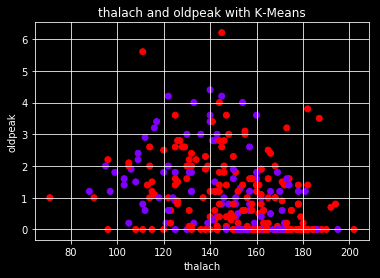

In [3]:
#Initial K-Means

km = KMeans(
    n_clusters=Nclusters, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=rand
).fit(X)
#print(km.labels_)
accur = np.mean(km.labels_ != y)
print('Accuracy:  ', accur)
x_ax = 'thalach'
y_ax = 'oldpeak'
plt.style.use('dark_background')
ax=plt.axes()
ax.grid()
plt.title('{} and {} with K-Means'.format(x_ax, y_ax))
plt.xlabel('{}'.format(x_ax))
plt.ylabel('{}'.format(y_ax))
plt.scatter(X[x_ax],X[y_ax], c=km.labels_, cmap='rainbow')
plt.savefig('heart_kmeans_only.png')

Accuracy:   0.5412541254125413


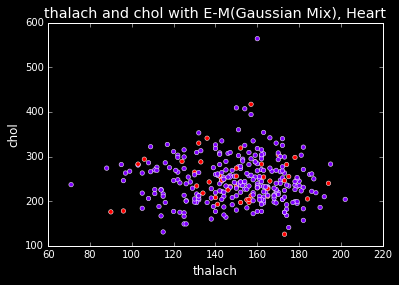

In [474]:
#Initial Gaussian Mixture (Expectation Maximization)

gm = GaussianMixture(n_components=Nclusters, n_init=10, random_state=rand)
gm.fit(X)
labels = gm.predict(X)
#print(labels)
accur = np.mean(labels != y)
print('Accuracy:  ', accur)
x_ax = 'thalach'
y_ax = 'chol'
plt.style.use('dark_background')
ax=plt.axes()
ax.grid()
plt.title('{} and {} with E-M(Gaussian Mix), Heart'.format(x_ax, y_ax))
plt.xlabel('{}'.format(x_ax))
plt.ylabel('{}'.format(y_ax))
plt.scatter(X[x_ax],X[y_ax], c=labels, cmap='rainbow')
plt.savefig('heart_EM_only.png')

[0.7475642  0.15037022]


,principal component 1,principal component 2
0,-12.267345,2.873838
1,2.690137,-39.871374
2,-42.950214,-23.636820


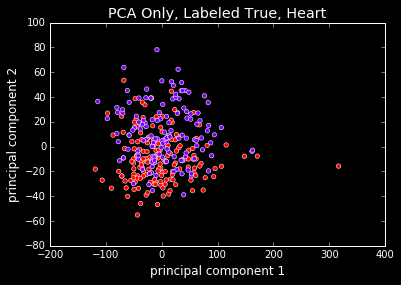

In [475]:
#PCA Only

#SX = StandardScaler().fit_transform(X)
pca = PCA(n_components=2, random_state=rand)
X2D = pca.fit_transform(X)
pcaDf = pd.DataFrame(data = X2D
             , columns = ['principal component 1', 'principal component 2'])
#principalDf.info()
print(pca.explained_variance_ratio_)
x_ax = 'principal component 1'
y_ax = 'principal component 2'
plt.style.use('dark_background')
ax = plt.axes()
ax.grid()
plt.title('PCA Only, Labeled True, Heart'.format(x_ax, y_ax))
plt.xlabel('{}'.format(x_ax))
plt.ylabel('{}'.format(y_ax))
plt.scatter(pcaDf[x_ax],pcaDf[y_ax], c=y, cmap='rainbow')
plt.savefig('heart_PCA_only.png')
pcaDf.head(3)

Accuracy:   0.42244224422442245


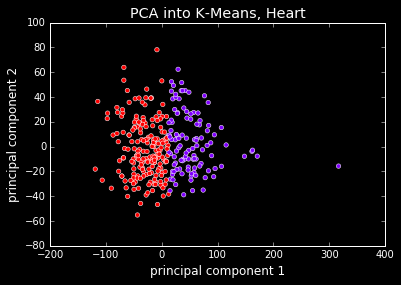

In [476]:
#PCA >>>> K Means

km = KMeans(
    n_clusters=Nclusters, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=rand
).fit(pcaDf)
#print(km.labels_)
accur = np.mean(km.labels_ != y)
print('Accuracy:  ', accur)
#x_ax = 'x'
#y_ax = 'y'
plt.style.use('dark_background')
ax=plt.axes()
ax.grid()
plt.title('PCA into K-Means, Heart'.format(x_ax, y_ax))
plt.xlabel('{}'.format(x_ax))
plt.ylabel('{}'.format(y_ax))
plt.scatter(pcaDf[x_ax],pcaDf[y_ax], c=km.labels_, cmap='rainbow')
plt.savefig('heart_PCA_kmeans.png')

Accuracy:   0.6435643564356436


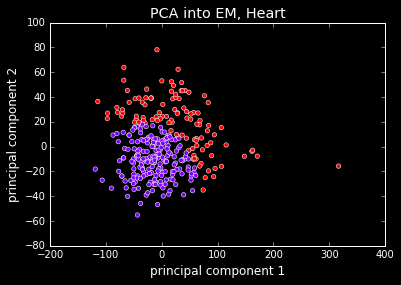

In [477]:
#PCA >>>> Gaussian Mixture (Expectation Maximization)

gm = GaussianMixture(n_components=Nclusters, n_init=10, random_state=rand)
gm.fit(pcaDf)
labels = gm.predict(pcaDf)
#print(labels)
accur = np.mean(labels != y)
print('Accuracy:  ', accur)
#x_ax = 'x'
#y_ax = 'y'
plt.style.use('dark_background')
ax=plt.axes()
ax.grid()
plt.title('PCA into EM, Heart'.format(x_ax, y_ax))
plt.xlabel('{}'.format(x_ax))
plt.ylabel('{}'.format(y_ax))
plt.scatter(pcaDf[x_ax],pcaDf[y_ax], c=labels, cmap='rainbow')
plt.savefig('heart_PCA_EM.png')

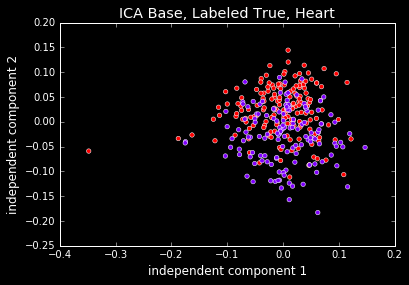

In [478]:
#ICA Only

ica = FastICA(n_components=2, random_state=rand)
X2D = ica.fit_transform(X)
icaDf = pd.DataFrame(data = X2D
             , columns = ['independent component 1', 'independent component 2'])
#plotDf.info()
#print(ica.mixing_)

x_ax = 'independent component 1'
y_ax = 'independent component 2'
plt.style.use('dark_background')
ax=plt.axes()
ax.grid()
plt.title('ICA Base, Labeled True, Heart'.format(x_ax, y_ax))
plt.xlabel('{}'.format(x_ax))
plt.ylabel('{}'.format(y_ax))
plt.scatter(icaDf[x_ax],icaDf[y_ax], c=y, cmap='rainbow')
plt.savefig('heart_ICA_only.png')

Accuracy:   0.6897689768976898


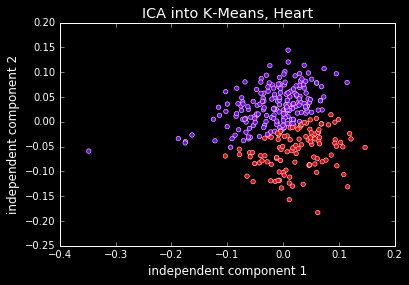

In [479]:
#ICA >>>> K Means

km = KMeans(
    n_clusters=Nclusters, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=rand
).fit(icaDf)
#print(km.labels_)
accur = np.mean(km.labels_ != y)
print('Accuracy:  ', accur)
#x_ax = 'x'
#y_ax = 'y'
plt.style.use('dark_background')
ax=plt.axes()
ax.grid()
plt.title('ICA into K-Means, Heart'.format(x_ax, y_ax))
plt.xlabel('{}'.format(x_ax))
plt.ylabel('{}'.format(y_ax))
plt.scatter(icaDf[x_ax],icaDf[y_ax], c=km.labels_, cmap='rainbow')
plt.savefig('heart_ICA_kmeans.png')

Accuracy:   0.6501650165016502


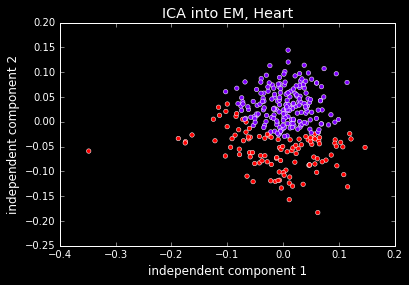

In [480]:
#ICA >>>> Gaussian Mixture (Expectation Maximization)

gm = GaussianMixture(n_components=Nclusters, n_init=10, random_state=rand)
gm.fit(icaDf)
labels = gm.predict(icaDf)
#print(labels)
accur = np.mean(labels != y)
print('Accuracy:  ', accur)
#x_ax = 'x'
#y_ax = 'y'
plt.style.use('dark_background')
ax=plt.axes()
ax.grid()
plt.title('ICA into EM, Heart'.format(x_ax, y_ax))
plt.xlabel('{}'.format(x_ax))
plt.ylabel('{}'.format(y_ax))
plt.scatter(icaDf[x_ax],icaDf[y_ax], c=labels, cmap='rainbow')
plt.savefig('heart_ICA_EM.png')

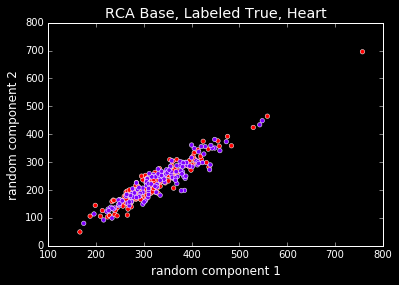

In [481]:
#RCA Only

rca = random_projection.SparseRandomProjection(n_components=2, random_state=rand) #changed random state for better results
X2D = rca.fit_transform(X)
rcaDf = pd.DataFrame(data = X2D
             , columns = ['random component 1', 'random component 2'])
#plotDf.info()
#print()

x_ax = 'random component 1'
y_ax = 'random component 2'
plt.style.use('dark_background')
ax=plt.axes()
ax.grid()
plt.title('RCA Base, Labeled True, Heart'.format(x_ax, y_ax))
plt.xlabel('{}'.format(x_ax))
plt.ylabel('{}'.format(y_ax))
plt.scatter(rcaDf[x_ax],rcaDf[y_ax], c=y, cmap='rainbow')
plt.savefig('heart_RCA_only.png')

Accuracy:   0.5841584158415841


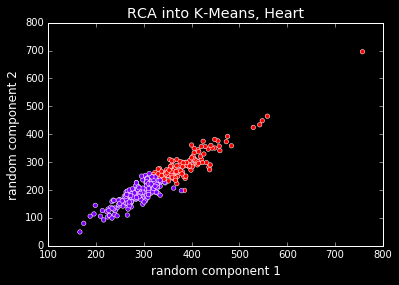

In [482]:
#RCA >>>> K Means

km = KMeans(
    n_clusters=Nclusters, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=rand
).fit(rcaDf)
#print(km.labels_)
accur = np.mean(km.labels_ != y)
print('Accuracy:  ', accur)
#x_ax = 'x'
#y_ax = 'y'
plt.style.use('dark_background')
ax=plt.axes()
ax.grid()
plt.title('RCA into K-Means, Heart'.format(x_ax, y_ax))
plt.xlabel('{}'.format(x_ax))
plt.ylabel('{}'.format(y_ax))
plt.scatter(rcaDf[x_ax],rcaDf[y_ax], c=km.labels_, cmap='rainbow')
plt.savefig('heart_RCA_kmeans.png')

Accuracy:   0.41254125412541254


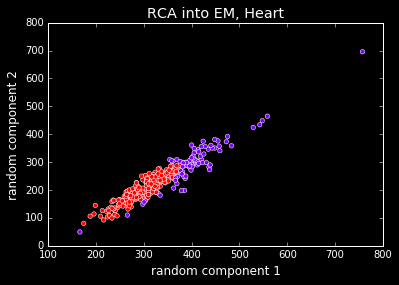

In [483]:
#RCA >>>> Gaussian Mixture (Expectation Maximization)

gm = GaussianMixture(n_components=Nclusters, n_init=10, random_state=rand)
gm.fit(rcaDf)
labels = gm.predict(rcaDf)
#print(labels)
accur = np.mean(labels != y)
print('Accuracy:  ', accur)
#x_ax = 'x'
#y_ax = 'y'
plt.style.use('dark_background')
ax=plt.axes()
ax.grid()
plt.title('RCA into EM, Heart'.format(x_ax, y_ax))
plt.xlabel('{}'.format(x_ax))
plt.ylabel('{}'.format(y_ax))
plt.scatter(rcaDf[x_ax],rcaDf[y_ax], c=labels, cmap='rainbow')
plt.savefig('heart_RCA_EM.png')

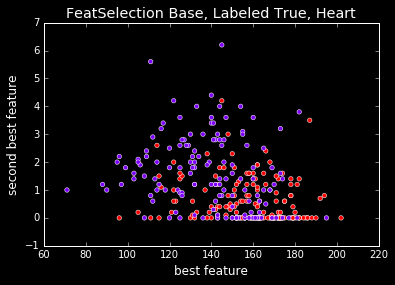

In [484]:
# Feature Selection:  kBest Features, Univariate feature selection
# Select the k best features based on univariate statistical tests

ufs = SelectKBest(chi2, k=2)
X2D = ufs.fit_transform(X,y)

ufsDf = pd.DataFrame(data = X2D
             , columns = ['best feature', 'second best feature'])
#ufsDf.info()

x_ax = 'best feature'
y_ax = 'second best feature'
plt.style.use('dark_background')
ax=plt.axes()
ax.grid()
plt.title('FeatSelection Base, Labeled True, Heart'.format(x_ax, y_ax))
plt.xlabel('{}'.format(x_ax))
plt.ylabel('{}'.format(y_ax))
plt.scatter(ufsDf[x_ax],ufsDf[y_ax], c=y, cmap='rainbow')
plt.savefig('heart_kbest_only.png')

Accuracy:   0.7029702970297029


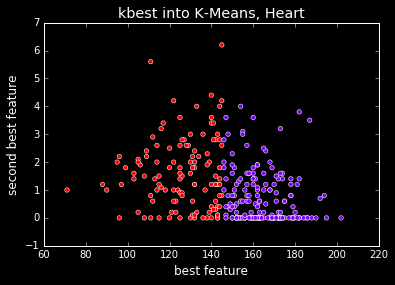

In [485]:
#kBest Features >>>> K Means

km = KMeans(
    n_clusters=Nclusters, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
).fit(ufsDf)
#print(km.labels_)
accur = np.mean(km.labels_ != y)
print('Accuracy:  ', accur)
#x_ax = 'x'
#y_ax = 'y'
plt.style.use('dark_background')
ax=plt.axes()
ax.grid()
plt.title('kbest into K-Means, Heart'.format(x_ax, y_ax))
plt.xlabel('{}'.format(x_ax))
plt.ylabel('{}'.format(y_ax))
plt.scatter(ufsDf[x_ax],ufsDf[y_ax], c=km.labels_, cmap='rainbow')
plt.savefig('heart_kbest_kmeans.png')

Accuracy:   0.6171617161716172


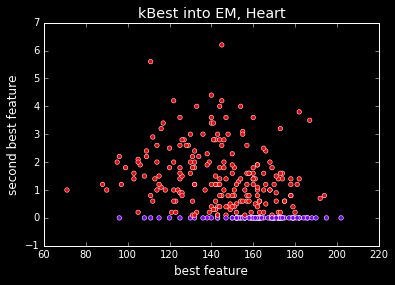

In [486]:
#kBest Features >>>> Gaussian Mixture (Expectation Maximization)

gm = GaussianMixture(n_components=Nclusters, n_init=10, random_state=0)
gm.fit(ufsDf)
labels = gm.predict(ufsDf)
#print(labels)
accur = np.mean(labels != y)
print('Accuracy:  ', accur)
#x_ax = 'x'
#y_ax = 'y'
plt.style.use('dark_background')
ax=plt.axes()
ax.grid()
plt.title('kBest into EM, Heart'.format(x_ax, y_ax))
plt.xlabel('{}'.format(x_ax))
plt.ylabel('{}'.format(y_ax))
plt.scatter(ufsDf[x_ax],ufsDf[y_ax], c=labels, cmap='rainbow')
plt.savefig('heart_kbest_EM.png')

In [487]:
# Base Neural Network (exactly as from assignment 1)

nndata = data
nndata[truelabel] =nndata[truelabel].astype(int)
nndata = pd.get_dummies(nndata, columns=[truelabel])
Xnn = nndata.iloc[:,0:len(feats)-1].values # first columns
Ynn = nndata.iloc[:,len(feats)-1:].values # last columns
Xnn = preprocessing.normalize(Xnn, axis = 0)
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(Xnn,Ynn,test_size=0.2, random_state=6)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

def build_ann(optimizer='adam', random_state=rand):
    
    # Initializing the ANN
    ann = Sequential()
    
    # layer 1
    ann.add(Dense(30, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_dim=13))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    # layer 2
    ann.add(Dense(50, name='fc1',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('tanh'))
    ann.add(Dropout(0.5))
    # layer 3
    ann.add(Dense(100, name='fc2',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('relu'))
    ann.add(Dropout(0.5))
    # layer 4
    ann.add(Dense(2, name='fc3',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('softmax'))
    
    # Compiling the ANN
    ann.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["categorical_accuracy"])
    
    return ann

opt = optimizers.Adam(lr=0.00005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
ann = build_ann(opt)

(242, 13) (242, 2) (61, 13) (61, 2)


In [488]:
# Training the ANN
history = ann.fit(x = X_train, y = Y_train, epochs = 200,verbose=1, batch_size = 64,validation_data=(X_test, Y_test))

Train on 242 samples, validate on 61 samples
Epoch 1/200
242/242 [==============================] - 6s 24ms/step - loss: 1.2541 - categorical_accuracy: 0.4174 - val_loss: 1.0631 - val_categorical_accuracy: 0.2787
Epoch 2/200
242/242 [==============================] - 0s 182us/step - loss: 1.2517 - categorical_accuracy: 0.4504 - val_loss: 1.0665 - val_categorical_accuracy: 0.2787
Epoch 3/200
242/242 [==============================] - 0s 165us/step - loss: 1.1604 - categorical_accuracy: 0.4339 - val_loss: 1.0461 - val_categorical_accuracy: 0.2787
Epoch 4/200
242/242 [==============================] - 0s 161us/step - loss: 1.2154 - categorical_accuracy: 0.4132 - val_loss: 1.0404 - val_categorical_accuracy: 0.2787
Epoch 5/200
242/242 [==============================] - 0s 169us/step - loss: 1.1442 - categorical_accuracy: 0.4628 - val_loss: 1.0343 - val_categorical_accuracy: 0.2787
Epoch 6/200
242/242 [==============================] - 0s 161us/step - loss: 1.1959 - categorical_accuracy: 0.4

Epoch 49/200
242/242 [==============================] - 0s 157us/step - loss: 0.8650 - categorical_accuracy: 0.6281 - val_loss: 0.7691 - val_categorical_accuracy: 0.7213
Epoch 50/200
242/242 [==============================] - 0s 169us/step - loss: 0.8795 - categorical_accuracy: 0.6322 - val_loss: 0.7658 - val_categorical_accuracy: 0.7213
Epoch 51/200
242/242 [==============================] - 0s 153us/step - loss: 0.8933 - categorical_accuracy: 0.6116 - val_loss: 0.7624 - val_categorical_accuracy: 0.7377
Epoch 52/200
242/242 [==============================] - 0s 169us/step - loss: 0.8757 - categorical_accuracy: 0.6281 - val_loss: 0.7591 - val_categorical_accuracy: 0.7377
Epoch 53/200
242/242 [==============================] - 0s 153us/step - loss: 0.8845 - categorical_accuracy: 0.6157 - val_loss: 0.7556 - val_categorical_accuracy: 0.7377
Epoch 54/200
242/242 [==============================] - 0s 161us/step - loss: 0.8457 - categorical_accuracy: 0.6240 - val_loss: 0.7527 - val_categoric

242/242 [==============================] - 0s 161us/step - loss: 0.6465 - categorical_accuracy: 0.7851 - val_loss: 0.6363 - val_categorical_accuracy: 0.7377
Epoch 146/200
242/242 [==============================] - 0s 157us/step - loss: 0.6537 - categorical_accuracy: 0.7769 - val_loss: 0.6361 - val_categorical_accuracy: 0.7377
Epoch 147/200
242/242 [==============================] - 0s 161us/step - loss: 0.7026 - categorical_accuracy: 0.7107 - val_loss: 0.6355 - val_categorical_accuracy: 0.7377
Epoch 148/200
242/242 [==============================] - 0s 161us/step - loss: 0.6719 - categorical_accuracy: 0.7769 - val_loss: 0.6349 - val_categorical_accuracy: 0.7377
Epoch 149/200
242/242 [==============================] - 0s 157us/step - loss: 0.6900 - categorical_accuracy: 0.7273 - val_loss: 0.6345 - val_categorical_accuracy: 0.7377
Epoch 150/200
242/242 [==============================] - 0s 161us/step - loss: 0.6949 - categorical_accuracy: 0.7479 - val_loss: 0.6341 - val_categorical_accur

Epoch 193/200
242/242 [==============================] - 0s 165us/step - loss: 0.6634 - categorical_accuracy: 0.7686 - val_loss: 0.6156 - val_categorical_accuracy: 0.7705
Epoch 194/200
242/242 [==============================] - 0s 165us/step - loss: 0.6409 - categorical_accuracy: 0.7934 - val_loss: 0.6153 - val_categorical_accuracy: 0.7705
Epoch 195/200
242/242 [==============================] - 0s 157us/step - loss: 0.6488 - categorical_accuracy: 0.7810 - val_loss: 0.6150 - val_categorical_accuracy: 0.7705
Epoch 196/200
242/242 [==============================] - 0s 161us/step - loss: 0.6440 - categorical_accuracy: 0.7603 - val_loss: 0.6147 - val_categorical_accuracy: 0.7705
Epoch 197/200
242/242 [==============================] - 0s 161us/step - loss: 0.6671 - categorical_accuracy: 0.7645 - val_loss: 0.6142 - val_categorical_accuracy: 0.7705
Epoch 198/200
242/242 [==============================] - 0s 161us/step - loss: 0.6499 - categorical_accuracy: 0.7686 - val_loss: 0.6137 - val_cat

Max accuracy: 0.7704917788505554


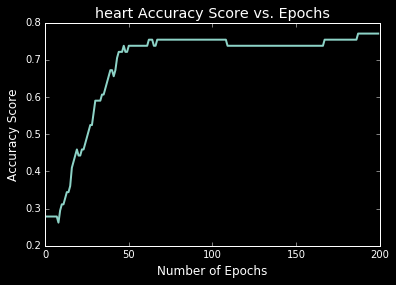

In [489]:
print('Max accuracy:', max(history.history['val_categorical_accuracy']))
plt.style.use('dark_background')
ax = plt.axes()
ax.grid()
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.title('heart Accuracy Score vs. Epochs')
plt.plot(history.history['val_categorical_accuracy'])
plt.savefig('heart_NN_original.png')

In [490]:
# Neural Network after PCA
which = pcaDf
numInput = len(list(which.columns.values)) #2 most of the time
nndata = pd.concat([which, y], axis=1, sort=False)
nndata[truelabel] =nndata[truelabel].astype(int)
nndata = pd.get_dummies(nndata, columns=[truelabel])
Xnn = nndata.iloc[:,0:numInput].values # first columns
Ynn = nndata.iloc[:,numInput:].values # last columns
Xnn = preprocessing.normalize(Xnn, axis = 0)
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(Xnn,Ynn,test_size=0.2, random_state=6)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

def build_ann(optimizer='adam', random_state=rand):
    
    # Initializing the ANN
    ann = Sequential()
    
    # layer 1
    ann.add(Dense(30, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_dim=numInput))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    # layer 2
    ann.add(Dense(50, name='fc1',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('tanh'))
    ann.add(Dropout(0.5))
    # layer 3
    ann.add(Dense(100, name='fc2',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('relu'))
    ann.add(Dropout(0.5))
    # layer 4
    ann.add(Dense(2, name='fc3',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('softmax'))
    
    # Compiling the ANN
    ann.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["categorical_accuracy"])
    
    return ann

opt = optimizers.Adam(lr=0.00005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
ann = build_ann(opt)

nndata.head(3)

(242, 2) (242, 2) (61, 2) (61, 2)


,principal component 1,principal component 2,target_0,target_1
0,-12.267345,2.873838,0,1
1,2.690137,-39.871374,0,1
2,-42.950214,-23.636820,0,1


In [491]:
# Training the ANN (PCA)
history = ann.fit(x = X_train, y = Y_train, epochs = 120,verbose=1, batch_size = 64,validation_data=(X_test, Y_test))

Train on 242 samples, validate on 61 samples
Epoch 1/120
242/242 [==============================] - 6s 26ms/step - loss: 0.9739 - categorical_accuracy: 0.5413 - val_loss: 0.8420 - val_categorical_accuracy: 0.4098
Epoch 2/120
242/242 [==============================] - 0s 186us/step - loss: 1.0646 - categorical_accuracy: 0.4132 - val_loss: 0.8326 - val_categorical_accuracy: 0.4426
Epoch 3/120
242/242 [==============================] - 0s 174us/step - loss: 1.0883 - categorical_accuracy: 0.4587 - val_loss: 0.8225 - val_categorical_accuracy: 0.4098
Epoch 4/120
242/242 [==============================] - 0s 174us/step - loss: 1.0286 - categorical_accuracy: 0.4587 - val_loss: 0.8165 - val_categorical_accuracy: 0.3934
Epoch 5/120
242/242 [==============================] - 0s 174us/step - loss: 0.9436 - categorical_accuracy: 0.5372 - val_loss: 0.8102 - val_categorical_accuracy: 0.4098
Epoch 6/120
242/242 [==============================] - 0s 174us/step - loss: 1.0715 - categorical_accuracy: 0.4

Epoch 49/120
242/242 [==============================] - 0s 157us/step - loss: 0.7745 - categorical_accuracy: 0.5909 - val_loss: 0.7095 - val_categorical_accuracy: 0.6230
Epoch 50/120
242/242 [==============================] - 0s 165us/step - loss: 0.8347 - categorical_accuracy: 0.5537 - val_loss: 0.7099 - val_categorical_accuracy: 0.6230
Epoch 51/120
242/242 [==============================] - 0s 153us/step - loss: 0.7339 - categorical_accuracy: 0.6281 - val_loss: 0.7103 - val_categorical_accuracy: 0.6230
Epoch 52/120
242/242 [==============================] - 0s 169us/step - loss: 0.8227 - categorical_accuracy: 0.5785 - val_loss: 0.7105 - val_categorical_accuracy: 0.6230
Epoch 53/120
242/242 [==============================] - 0s 157us/step - loss: 0.8303 - categorical_accuracy: 0.5661 - val_loss: 0.7109 - val_categorical_accuracy: 0.6230
Epoch 54/120
242/242 [==============================] - 0s 157us/step - loss: 0.8334 - categorical_accuracy: 0.6074 - val_loss: 0.7116 - val_categoric

Max accuracy: 0.6393442749977112


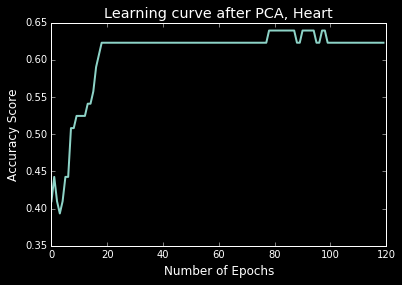

In [492]:
print('Max accuracy:', max(history.history['val_categorical_accuracy']))
plt.style.use('dark_background')
ax = plt.axes()
ax.grid()
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.title('Learning curve after PCA, Heart')
plt.plot(history.history['val_categorical_accuracy'])
plt.savefig('heart_NN_PCA.png')

In [493]:
# Neural Network after ICA
which = icaDf
numInput = len(list(which.columns.values)) #2 most of the time
nndata = pd.concat([which, y], axis=1, sort=False)
nndata[truelabel] =nndata[truelabel].astype(int)
nndata = pd.get_dummies(nndata, columns=[truelabel])
Xnn = nndata.iloc[:,0:numInput].values # first columns
Ynn = nndata.iloc[:,numInput:].values # last columns
Xnn = preprocessing.normalize(Xnn, axis = 0)
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(Xnn,Ynn,test_size=0.2, random_state=6)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

def build_ann(optimizer='adam', random_state=rand):
    
    # Initializing the ANN
    ann = Sequential()
    
    # layer 1
    ann.add(Dense(30, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_dim=numInput))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    # layer 2
    ann.add(Dense(50, name='fc1',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('tanh'))
    ann.add(Dropout(0.5))
    # layer 3
    ann.add(Dense(100, name='fc2',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('relu'))
    ann.add(Dropout(0.5))
    # layer 4
    ann.add(Dense(2, name='fc3',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('softmax'))
    
    # Compiling the ANN
    ann.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["categorical_accuracy"])
    
    return ann

opt = optimizers.Adam(lr=0.00005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
ann = build_ann(opt)

nndata.head(3)

(242, 2) (242, 2) (61, 2) (61, 2)


,independent component 1,independent component 2,target_0,target_1
0,0.015023,-0.003097,0,1
1,-0.029912,0.093923,0,1
2,0.029739,0.069232,0,1


In [494]:
# Training the ANN (ICA)
history = ann.fit(x = X_train, y = Y_train, epochs = 120,verbose=1, batch_size = 64,validation_data=(X_test, Y_test))

Train on 242 samples, validate on 61 samples
Epoch 1/120
242/242 [==============================] - 6s 26ms/step - loss: 0.9946 - categorical_accuracy: 0.4463 - val_loss: 0.8109 - val_categorical_accuracy: 0.3770
Epoch 2/120
242/242 [==============================] - 0s 182us/step - loss: 0.8941 - categorical_accuracy: 0.5083 - val_loss: 0.8010 - val_categorical_accuracy: 0.3934
Epoch 3/120
242/242 [==============================] - 0s 174us/step - loss: 0.8795 - categorical_accuracy: 0.5207 - val_loss: 0.7887 - val_categorical_accuracy: 0.3934
Epoch 4/120
242/242 [==============================] - 0s 169us/step - loss: 0.9963 - categorical_accuracy: 0.4876 - val_loss: 0.7717 - val_categorical_accuracy: 0.4426
Epoch 5/120
242/242 [==============================] - 0s 169us/step - loss: 0.9432 - categorical_accuracy: 0.4669 - val_loss: 0.7647 - val_categorical_accuracy: 0.4426
Epoch 6/120
242/242 [==============================] - 0s 169us/step - loss: 0.8971 - categorical_accuracy: 0.5

Epoch 49/120
242/242 [==============================] - 0s 157us/step - loss: 0.7826 - categorical_accuracy: 0.5702 - val_loss: 0.6451 - val_categorical_accuracy: 0.6230
Epoch 50/120
242/242 [==============================] - 0s 161us/step - loss: 0.8316 - categorical_accuracy: 0.5289 - val_loss: 0.6452 - val_categorical_accuracy: 0.6393
Epoch 51/120
242/242 [==============================] - 0s 186us/step - loss: 0.7354 - categorical_accuracy: 0.6033 - val_loss: 0.6451 - val_categorical_accuracy: 0.6393
Epoch 52/120
242/242 [==============================] - 0s 178us/step - loss: 0.6911 - categorical_accuracy: 0.6198 - val_loss: 0.6454 - val_categorical_accuracy: 0.6557
Epoch 53/120
242/242 [==============================] - 0s 174us/step - loss: 0.7440 - categorical_accuracy: 0.5702 - val_loss: 0.6452 - val_categorical_accuracy: 0.6721
Epoch 54/120
242/242 [==============================] - 0s 174us/step - loss: 0.7218 - categorical_accuracy: 0.6240 - val_loss: 0.6449 - val_categoric

Max accuracy: 0.7049180269241333


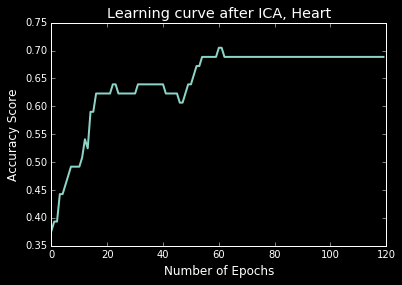

In [495]:
print('Max accuracy:', max(history.history['val_categorical_accuracy']))
plt.style.use('dark_background')
ax = plt.axes()
ax.grid()
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.title('Learning curve after ICA, Heart')
plt.plot(history.history['val_categorical_accuracy'])
plt.savefig('heart_NN_ICA.png')

In [496]:
# Neural Network after RCA
which = rcaDf
numInput = len(list(which.columns.values)) #2 most of the time
nndata = pd.concat([which, y], axis=1, sort=False)
nndata[truelabel] =nndata[truelabel].astype(int)
nndata = pd.get_dummies(nndata, columns=[truelabel])
Xnn = nndata.iloc[:,0:numInput].values # first columns
Ynn = nndata.iloc[:,numInput:].values # last columns
Xnn = preprocessing.normalize(Xnn, axis = 0)
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(Xnn,Ynn,test_size=0.2, random_state=6)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

def build_ann(optimizer='adam', random_state=rand):
    
    # Initializing the ANN
    ann = Sequential()
    
    # layer 1
    ann.add(Dense(30, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_dim=numInput))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    # layer 2
    ann.add(Dense(50, name='fc1',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('tanh'))
    ann.add(Dropout(0.5))
    # layer 3
    ann.add(Dense(100, name='fc2',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('relu'))
    ann.add(Dropout(0.5))
    # layer 4
    ann.add(Dense(2, name='fc3',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('softmax'))
    
    # Compiling the ANN
    ann.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["categorical_accuracy"])
    
    return ann

opt = optimizers.Adam(lr=0.00005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
ann = build_ann(opt)

nndata.head(3)

(242, 2) (242, 2) (61, 2) (61, 2)


,random component 1,random component 2,target_0,target_1
0,312.843230,208.114595,0,1
1,334.326027,213.485294,0,1
2,273.905661,155.750278,0,1


In [497]:
# Training the ANN (RCA)
history = ann.fit(x = X_train, y = Y_train, epochs = 120,verbose=1, batch_size = 64,validation_data=(X_test, Y_test))

Train on 242 samples, validate on 61 samples
Epoch 1/120
242/242 [==============================] - 7s 27ms/step - loss: 0.9758 - categorical_accuracy: 0.4545 - val_loss: 0.7856 - val_categorical_accuracy: 0.4754
Epoch 2/120
242/242 [==============================] - 0s 186us/step - loss: 0.9417 - categorical_accuracy: 0.5041 - val_loss: 0.7933 - val_categorical_accuracy: 0.4754
Epoch 3/120
242/242 [==============================] - 0s 178us/step - loss: 0.9935 - categorical_accuracy: 0.4298 - val_loss: 0.7918 - val_categorical_accuracy: 0.4754
Epoch 4/120
242/242 [==============================] - 0s 174us/step - loss: 0.8957 - categorical_accuracy: 0.5165 - val_loss: 0.7893 - val_categorical_accuracy: 0.5082
Epoch 5/120
242/242 [==============================] - 0s 165us/step - loss: 0.9471 - categorical_accuracy: 0.4711 - val_loss: 0.7866 - val_categorical_accuracy: 0.5082
Epoch 6/120
242/242 [==============================] - 0s 174us/step - loss: 0.9015 - categorical_accuracy: 0.5

Epoch 49/120
242/242 [==============================] - 0s 174us/step - loss: 0.8869 - categorical_accuracy: 0.5207 - val_loss: 0.7843 - val_categorical_accuracy: 0.4590
Epoch 50/120
242/242 [==============================] - 0s 165us/step - loss: 0.8704 - categorical_accuracy: 0.5413 - val_loss: 0.7848 - val_categorical_accuracy: 0.4426
Epoch 51/120
242/242 [==============================] - 0s 169us/step - loss: 0.8563 - categorical_accuracy: 0.5289 - val_loss: 0.7858 - val_categorical_accuracy: 0.4426
Epoch 52/120
242/242 [==============================] - 0s 169us/step - loss: 0.9531 - categorical_accuracy: 0.4463 - val_loss: 0.7872 - val_categorical_accuracy: 0.4590
Epoch 53/120
242/242 [==============================] - 0s 165us/step - loss: 0.9501 - categorical_accuracy: 0.5041 - val_loss: 0.7881 - val_categorical_accuracy: 0.4590
Epoch 54/120
242/242 [==============================] - 0s 161us/step - loss: 0.8832 - categorical_accuracy: 0.5413 - val_loss: 0.7875 - val_categoric

Max accuracy: 0.5245901346206665


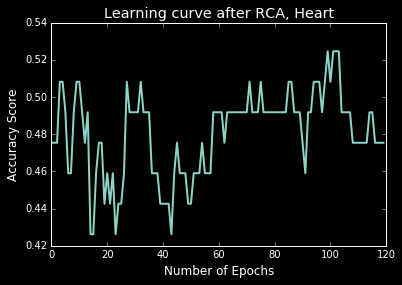

In [498]:
print('Max accuracy:', max(history.history['val_categorical_accuracy']))
plt.style.use('dark_background')
ax = plt.axes()
ax.grid()
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.title('Learning curve after RCA, Heart')
plt.plot(history.history['val_categorical_accuracy'])
plt.savefig('heart_NN_RCA.png')

In [499]:
# Neural Network after kBest
which = ufsDf
numInput = len(list(which.columns.values)) #2 most of the time
nndata = pd.concat([which, y], axis=1, sort=False)
nndata[truelabel] =nndata[truelabel].astype(int)
nndata = pd.get_dummies(nndata, columns=[truelabel])
Xnn = nndata.iloc[:,0:numInput].values # first columns
Ynn = nndata.iloc[:,numInput:].values # last columns
Xnn = preprocessing.normalize(Xnn, axis = 0)
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(Xnn,Ynn,test_size=0.2, random_state=6)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

def build_ann(optimizer='adam', random_state=rand):
    
    # Initializing the ANN
    ann = Sequential()
    
    # layer 1
    ann.add(Dense(30, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_dim=numInput))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    # layer 2
    ann.add(Dense(50, name='fc1',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('tanh'))
    ann.add(Dropout(0.5))
    # layer 3
    ann.add(Dense(100, name='fc2',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('relu'))
    ann.add(Dropout(0.5))
    # layer 4
    ann.add(Dense(2, name='fc3',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('softmax'))
    
    # Compiling the ANN
    ann.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["categorical_accuracy"])
    
    return ann

opt = optimizers.Adam(lr=0.00005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
ann = build_ann(opt)

nndata.head(3)

(242, 2) (242, 2) (61, 2) (61, 2)


,best feature,second best feature,target_0,target_1
0,150.0,2.3,0,1
1,187.0,3.5,0,1
2,172.0,1.4,0,1


In [500]:
# Training the ANN (kBest)
history = ann.fit(x = X_train, y = Y_train, epochs = 120,verbose=1, batch_size = 64,validation_data=(X_test, Y_test))

Train on 242 samples, validate on 61 samples
Epoch 1/120
242/242 [==============================] - 7s 29ms/step - loss: 0.8689 - categorical_accuracy: 0.5207 - val_loss: 0.7301 - val_categorical_accuracy: 0.5410
Epoch 2/120
242/242 [==============================] - 0s 178us/step - loss: 0.9053 - categorical_accuracy: 0.5124 - val_loss: 0.7239 - val_categorical_accuracy: 0.5082
Epoch 3/120
242/242 [==============================] - 0s 169us/step - loss: 0.9288 - categorical_accuracy: 0.5413 - val_loss: 0.7260 - val_categorical_accuracy: 0.5082
Epoch 4/120
242/242 [==============================] - 0s 169us/step - loss: 0.9144 - categorical_accuracy: 0.5124 - val_loss: 0.7105 - val_categorical_accuracy: 0.5082
Epoch 5/120
242/242 [==============================] - 0s 157us/step - loss: 0.8002 - categorical_accuracy: 0.6074 - val_loss: 0.6996 - val_categorical_accuracy: 0.5738
Epoch 6/120
242/242 [==============================] - 0s 169us/step - loss: 0.9006 - categorical_accuracy: 0.5

Epoch 49/120
242/242 [==============================] - 0s 165us/step - loss: 0.6662 - categorical_accuracy: 0.6818 - val_loss: 0.6412 - val_categorical_accuracy: 0.7049
Epoch 50/120
242/242 [==============================] - 0s 178us/step - loss: 0.6744 - categorical_accuracy: 0.6777 - val_loss: 0.6416 - val_categorical_accuracy: 0.7049
Epoch 51/120
242/242 [==============================] - 0s 178us/step - loss: 0.7043 - categorical_accuracy: 0.6281 - val_loss: 0.6418 - val_categorical_accuracy: 0.7049
Epoch 52/120
242/242 [==============================] - 0s 169us/step - loss: 0.7075 - categorical_accuracy: 0.6488 - val_loss: 0.6426 - val_categorical_accuracy: 0.7049
Epoch 53/120
242/242 [==============================] - 0s 165us/step - loss: 0.7003 - categorical_accuracy: 0.6694 - val_loss: 0.6434 - val_categorical_accuracy: 0.7049
Epoch 54/120
242/242 [==============================] - 0s 178us/step - loss: 0.7345 - categorical_accuracy: 0.6157 - val_loss: 0.6444 - val_categoric

Max accuracy: 0.7213114500045776


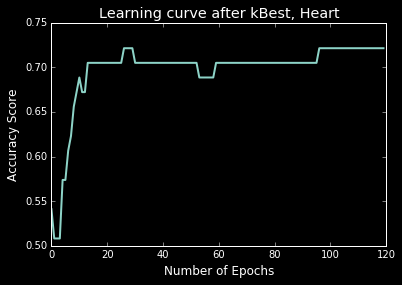

In [501]:
print('Max accuracy:', max(history.history['val_categorical_accuracy']))
plt.style.use('dark_background')
ax = plt.axes()
ax.grid()
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.title('Learning curve after kBest, Heart')
plt.plot(history.history['val_categorical_accuracy'])
plt.savefig('heart_NN_kbest.png')

In [510]:
# Neural Network after using just K-means clusters as features
km = KMeans(
    n_clusters=Nclusters, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=rand
).fit(X)
#print(km.labels_)
kmeansDf = pd.DataFrame(data = km.labels_
             , columns = ['cluster',])

which = kmeansDf
numInput = len(list(which.columns.values)) #2 most of the time
nndata = pd.concat([which, y], axis=1, sort=False)
nndata[truelabel] =nndata[truelabel].astype(int)
nndata = pd.get_dummies(nndata, columns=[truelabel])
Xnn = nndata.iloc[:,0:numInput].values # first columns
Ynn = nndata.iloc[:,numInput:].values # last columns
Xnn = preprocessing.normalize(Xnn, axis = 0)
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(Xnn,Ynn,test_size=0.2, random_state=6)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

def build_ann(optimizer='adam', random_state=rand):
    
    # Initializing the ANN
    ann = Sequential()
    
    # layer 1
    ann.add(Dense(30, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_dim=numInput))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    # layer 2
    ann.add(Dense(50, name='fc1',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('tanh'))
    ann.add(Dropout(0.5))
    # layer 3
    ann.add(Dense(100, name='fc2',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('relu'))
    ann.add(Dropout(0.5))
    # layer 4
    ann.add(Dense(2, name='fc3',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('softmax'))
    
    # Compiling the ANN
    ann.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["categorical_accuracy"])
    
    return ann

opt = optimizers.Adam(lr=0.00005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
ann = build_ann(opt)

nndata.head(3)

(242, 1) (242, 2) (61, 1) (61, 2)


,cluster,target_0,target_1
0,1,0,1
1,1,0,1
2,1,0,1


In [511]:
# Training the ANN (kmeans as features)
history = ann.fit(x = X_train, y = Y_train, epochs = 120,verbose=1, batch_size = 64,validation_data=(X_test, Y_test))

Train on 242 samples, validate on 61 samples
Epoch 1/120
242/242 [==============================] - 7s 30ms/step - loss: 0.9861 - categorical_accuracy: 0.4050 - val_loss: 0.7933 - val_categorical_accuracy: 0.4262
Epoch 2/120
242/242 [==============================] - 0s 186us/step - loss: 0.9043 - categorical_accuracy: 0.4711 - val_loss: 0.7834 - val_categorical_accuracy: 0.4262
Epoch 3/120
242/242 [==============================] - 0s 178us/step - loss: 0.8814 - categorical_accuracy: 0.5041 - val_loss: 0.7764 - val_categorical_accuracy: 0.4262
Epoch 4/120
242/242 [==============================] - 0s 174us/step - loss: 0.9753 - categorical_accuracy: 0.4959 - val_loss: 0.7693 - val_categorical_accuracy: 0.4262
Epoch 5/120
242/242 [==============================] - 0s 178us/step - loss: 0.9449 - categorical_accuracy: 0.4835 - val_loss: 0.7624 - val_categorical_accuracy: 0.4262
Epoch 6/120
242/242 [==============================] - 0s 178us/step - loss: 0.8800 - categorical_accuracy: 0.4

Epoch 49/120
242/242 [==============================] - 0s 186us/step - loss: 0.8405 - categorical_accuracy: 0.4917 - val_loss: 0.7027 - val_categorical_accuracy: 0.5738
Epoch 50/120
242/242 [==============================] - 0s 178us/step - loss: 0.8235 - categorical_accuracy: 0.4587 - val_loss: 0.7026 - val_categorical_accuracy: 0.5738
Epoch 51/120
242/242 [==============================] - 0s 174us/step - loss: 0.8257 - categorical_accuracy: 0.4876 - val_loss: 0.7027 - val_categorical_accuracy: 0.5738
Epoch 52/120
242/242 [==============================] - 0s 178us/step - loss: 0.7578 - categorical_accuracy: 0.5826 - val_loss: 0.7029 - val_categorical_accuracy: 0.5738
Epoch 53/120
242/242 [==============================] - 0s 178us/step - loss: 0.8573 - categorical_accuracy: 0.4876 - val_loss: 0.7030 - val_categorical_accuracy: 0.5738
Epoch 54/120
242/242 [==============================] - 0s 178us/step - loss: 0.8205 - categorical_accuracy: 0.5207 - val_loss: 0.7031 - val_categoric

Max accuracy: 0.5737704634666443


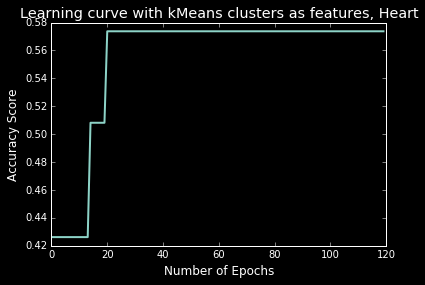

In [512]:
print('Max accuracy:', max(history.history['val_categorical_accuracy']))
plt.style.use('dark_background')
ax = plt.axes()
ax.grid()
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.title('Learning curve with kMeans clusters as features, Heart')
plt.plot(history.history['val_categorical_accuracy'])
plt.savefig('heart_NN_kmeans_as_features.png')

In [513]:
# Neural Network after using just EM clusters as features
gm = GaussianMixture(n_components=Nclusters, n_init=10, random_state=rand)
gm.fit(X)
labels = gm.predict(X)
emDf = pd.DataFrame(data = labels
             , columns = ['cluster',])

which = kmeansDf
numInput = len(list(which.columns.values)) #2 most of the time
nndata = pd.concat([which, y], axis=1, sort=False)
nndata[truelabel] =nndata[truelabel].astype(int)
nndata = pd.get_dummies(nndata, columns=[truelabel])
Xnn = nndata.iloc[:,0:numInput].values # first columns
Ynn = nndata.iloc[:,numInput:].values # last columns
Xnn = preprocessing.normalize(Xnn, axis = 0)
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(Xnn,Ynn,test_size=0.2, random_state=6)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

def build_ann(optimizer='adam', random_state=rand):
    
    # Initializing the ANN
    ann = Sequential()
    
    # layer 1
    ann.add(Dense(30, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_dim=numInput))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    # layer 2
    ann.add(Dense(50, name='fc1',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('tanh'))
    ann.add(Dropout(0.5))
    # layer 3
    ann.add(Dense(100, name='fc2',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('relu'))
    ann.add(Dropout(0.5))
    # layer 4
    ann.add(Dense(2, name='fc3',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('softmax'))
    
    # Compiling the ANN
    ann.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["categorical_accuracy"])
    
    return ann

opt = optimizers.Adam(lr=0.00005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
ann = build_ann(opt)

nndata.head(3)

(242, 1) (242, 2) (61, 1) (61, 2)


,cluster,target_0,target_1
0,1,0,1
1,1,0,1
2,1,0,1


In [514]:
# Training the ANN (EM clusters as features)
history = ann.fit(x = X_train, y = Y_train, epochs = 120,verbose=1, batch_size = 64,validation_data=(X_test, Y_test))

Train on 242 samples, validate on 61 samples
Epoch 1/120
242/242 [==============================] - 8s 32ms/step - loss: 0.9840 - categorical_accuracy: 0.4793 - val_loss: 0.7958 - val_categorical_accuracy: 0.4262
Epoch 2/120
242/242 [==============================] - 0s 186us/step - loss: 0.9057 - categorical_accuracy: 0.5041 - val_loss: 0.7921 - val_categorical_accuracy: 0.4262
Epoch 3/120
242/242 [==============================] - 0s 169us/step - loss: 1.0152 - categorical_accuracy: 0.4463 - val_loss: 0.7822 - val_categorical_accuracy: 0.4262
Epoch 4/120
242/242 [==============================] - 0s 178us/step - loss: 0.9791 - categorical_accuracy: 0.4835 - val_loss: 0.7723 - val_categorical_accuracy: 0.4262
Epoch 5/120
242/242 [==============================] - 0s 174us/step - loss: 0.9793 - categorical_accuracy: 0.4628 - val_loss: 0.7672 - val_categorical_accuracy: 0.4262
Epoch 6/120
242/242 [==============================] - 0s 178us/step - loss: 0.9855 - categorical_accuracy: 0.4

Epoch 49/120
242/242 [==============================] - 0s 169us/step - loss: 0.7710 - categorical_accuracy: 0.5372 - val_loss: 0.7017 - val_categorical_accuracy: 0.5082
Epoch 50/120
242/242 [==============================] - 0s 174us/step - loss: 0.8185 - categorical_accuracy: 0.5413 - val_loss: 0.7018 - val_categorical_accuracy: 0.5082
Epoch 51/120
242/242 [==============================] - 0s 165us/step - loss: 0.9091 - categorical_accuracy: 0.4215 - val_loss: 0.7015 - val_categorical_accuracy: 0.5082
Epoch 52/120
242/242 [==============================] - 0s 182us/step - loss: 0.8270 - categorical_accuracy: 0.4835 - val_loss: 0.7012 - val_categorical_accuracy: 0.5082
Epoch 53/120
242/242 [==============================] - 0s 178us/step - loss: 0.7936 - categorical_accuracy: 0.5372 - val_loss: 0.7010 - val_categorical_accuracy: 0.5082
Epoch 54/120
242/242 [==============================] - 0s 174us/step - loss: 0.8192 - categorical_accuracy: 0.5041 - val_loss: 0.7008 - val_categoric

Max accuracy: 0.5737704634666443


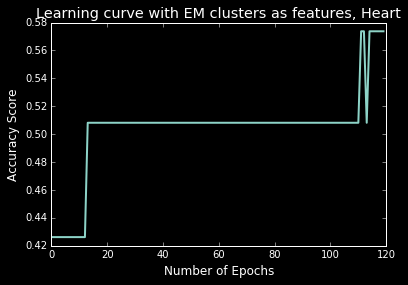

In [515]:
print('Max accuracy:', max(history.history['val_categorical_accuracy']))
plt.style.use('dark_background')
ax = plt.axes()
ax.grid()
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.title('Learning curve with EM clusters as features, Heart')
plt.plot(history.history['val_categorical_accuracy'])
plt.savefig('heart_NN_EM_as_features.png')